# Inverse

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

## Compute inverse by numpy
- Random number matrix is almost 100% linearly independet matrix, so it's invertible

Original matrix
[[-1.1 -1.8 -1.2]
 [ 0.2  0.  -1.4]
 [-0.7  2.1 -1.1]]

Matrix inverse
[[-0.5  0.8 -0.4]
 [-0.2 -0.1  0.3]
 [-0.1 -0.6 -0.1]]

A $A^{-1}$
[[ 1. -0.  0.]
 [-0.  1.  0.]
 [ 0.  0.  1.]]



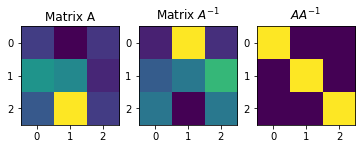

In [6]:
m = 3

A = np.random.randn(m, m)
print('Original matrix')
print(np.round(A, 1))
print()

Ainv = np.linalg.inv(A)
print('Matrix inverse')
print(np.round(Ainv, 1))
print()

idm = A @ Ainv
print('A $A^{-1}$')
print(np.round(idm, 1))
print()

plt.subplot(131)
plt.imshow(A)
plt.title('Matrix A')

plt.subplot(132)
plt.imshow(Ainv)
plt.title('Matrix $A^{-1}$')

plt.subplot(133)
plt.imshow(idm)
plt.title('$A A^{-1}$')

plt.show()

## MCA algorithm
1. Minors matrix
2. Cofactors matrix
3. Adjugate matrix

$A$
[[ 2.1 -0.9  0.2  1.4]
 [ 1.9  0.2 -1.  -0.8]
 [ 0.5  0.6 -0.2 -0.2]
 [ 0.8 -1.8  0.3 -2.4]]

$A^{-1}$
[[ 0.3 -0.1  0.9  0.1]
 [-0.  -0.3  1.5 -0. ]
 [ 0.4 -1.2  2.3  0.5]
 [ 0.2  0.  -0.5 -0.3]]

$A A^{-1}$
[[ 1. -0. -0.  0.]
 [ 0.  1.  0.  0.]
 [-0.  0.  1. -0.]
 [-0. -0. -0.  1.]]



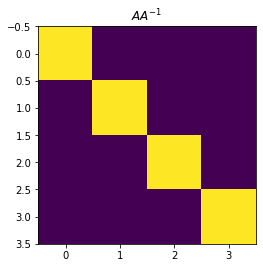

In [9]:
m = 4
A = np.random.randn(m, m)

# Minors matrix
minors = np.zeros((m, m))
H = np.zeros((m, m))

for i in range(m):
    for j in range(m):
        
        # Selet sub-matrix to calculate determinant
        rows = [True] * m
        rows[i] = False
        cols = [True] * m
        cols[j] = False
        
        # Compute minors matrix
        minors[i, j] = np.linalg.det(A[rows, :][:, cols])
        
        # Compute +/- checkerboard
        H[i, j] = (-1) ** (i + j)

# Cofactor matrix
C = H * minors

# Adjugate matrix
Ainv = C.T / np.linalg.det(A)

print('$A$')
print(np.round(A, 1))
print()
print('$A^{-1}$')
print(np.round(Ainv, 1))
print()
print('$A A^{-1}$')
print(np.round(A @ Ainv, 1))
print()

plt.imshow(A @ Ainv)
plt.title('$A A^{-1}$')
plt.show()

## Compute inverse via row reduction
- Do $rref([A | I]) = [I | A^{-1}]$

In [5]:
m = 4

A = Matrix(np.round(10 * np.random.randn(m, m)), dtype='float')
print('A')
A

A


Matrix([
[ -3.0,  15.0,  13.0, -9.0],
[  7.0,   7.0, -10.0,  9.0],
[-10.0, -10.0, -11.0, 12.0],
[ -6.0,   4.0,   1.0, -2.0]])

In [10]:
Aaug = Matrix(np.concatenate((A, np.eye(m, m)), axis=1))
print('Augmented A')
print(f'Size: {Aaug.shape}')
Aaug

Augmented A
Size: (4, 8)


Matrix([
[ -3.0,  15.0,  13.0, -9.0, 1.0,   0,   0,   0],
[  7.0,   7.0, -10.0,  9.0,   0, 1.0,   0,   0],
[-10.0, -10.0, -11.0, 12.0,   0,   0, 1.0,   0],
[ -6.0,   4.0,   1.0, -2.0,   0,   0,   0, 1.0]])

In [14]:
Asol = Aaug.rref()
print('Row reduction')
Asol[0]

Row reduction


Matrix([
[1, 0, 0, 0, -0.00829875518672199,  0.0179806362378976,  -0.0338865836791148, -0.0850622406639004],
[0, 1, 0, 0,   0.0264522821576763,  0.0468533886583679, -0.00656984785615491,  0.0523858921161826],
[0, 0, 1, 0,    0.150414937759336, -0.0342323651452282,   0.0933609958506224,  -0.270746887966805],
[0, 0, 0, 1,    0.153008298755187,  0.0226486860304288,    0.135200553250346,  -0.275414937759336]])

In [20]:
Ainvrref = Asol[0][:, m : m * 2]
print('$A^{-1}$ via row reduction')
Ainvrref

$A^{-1}$ via row reduction


Matrix([
[-0.00829875518672199,  0.0179806362378976,  -0.0338865836791148, -0.0850622406639004],
[  0.0264522821576763,  0.0468533886583679, -0.00656984785615491,  0.0523858921161826],
[   0.150414937759336, -0.0342323651452282,   0.0933609958506224,  -0.270746887966805],
[   0.153008298755187,  0.0226486860304288,    0.135200553250346,  -0.275414937759336]])

In [24]:
Ainv = A.inv()
print('$A^{-1}$ by sympy inv() method')
Ainv

$A^{-1}$ by sympy inv() method


Matrix([
[-0.00829875518672199,  0.0179806362378976,  -0.0338865836791148, -0.0850622406639004],
[  0.0264522821576763,  0.0468533886583679, -0.00656984785615491,  0.0523858921161826],
[   0.150414937759336, -0.0342323651452282,   0.0933609958506224,  -0.270746887966805],
[   0.153008298755187,  0.0226486860304288,    0.135200553250346,  -0.275414937759336]])

In [23]:
Ainvrref - Ainv

Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

## Inverse of diagonal matrix

In [3]:
A = np.array([
    [2, 0],
    [0, 3]
])

print('A')
print(A)
print()
print('Inverse of A')
print(np.linalg.inv(A))
print()

A
[[2 0]
 [0 3]]

Inverse of A
[[0.5        0.        ]
 [0.         0.33333333]]



In [9]:
A = np.diag(np.arange(1, 5 + 1))

print('A')
print(A)
print()
print('Inverse of A')
print(np.linalg.inv(A))
print()
print(f'1 / 1: {1 / 1}')
print(f'1 / 2: {1 / 2}')
print(f'1 / 3: {1 / 3}')
print(f'1 / 4: {1 / 4}')
print(f'1 / 5: {1 / 5}')

A
[[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]

Inverse of A
[[1.         0.         0.         0.         0.        ]
 [0.         0.5        0.         0.         0.        ]
 [0.         0.         0.33333333 0.         0.        ]
 [0.         0.         0.         0.25       0.        ]
 [0.         0.         0.         0.         0.2       ]]

1 / 1: 1.0
1 / 2: 0.5
1 / 3: 0.3333333333333333
1 / 4: 0.25
1 / 5: 0.2


## Left inverse
- $(A^{T} A)^{-1} (A^{T} A) = I$
- $(A^{T} A)^{-1} A^{T}$ is left inverse of $A$

In [13]:
# Create tall matrix by mxn, m > n
m = 6
n = 3

# Use random to make it a full-rank matrix
A = np.random.randn(m, n)
print('A')
print(A.shape)
print(np.round(A, 2))
print()

AtA = A.T @ A
print('A^T A')
print(AtA.shape)
print(np.round(AtA, 2))
print(f'Rank of A^T A: {np.linalg.matrix_rank(AtA)}')
print('A^T A gives us a square symmetrix matrix')
print()

# Create left inverse
left_inverse = np.linalg.inv(AtA) @ A.T
print('Left inverse of A')
print(left_inverse.shape)
print(np.round(left_inverse, 2))
print()

# Left inverse times A to get indentity matrix
I = left_inverse @ A
print('Left inverse times A')
print(I.shape)
print(np.round(I, 2))
print()

A
(6, 3)
[[-0.01 -1.52  0.04]
 [ 2.04  1.57 -1.64]
 [-0.19  1.33 -0.36]
 [ 0.6   1.73  0.53]
 [ 1.02  0.08 -1.3 ]
 [ 0.32 -0.37 -0.16]]

A^T A
(3, 3)
[[ 5.71  3.97 -4.35]
 [ 3.97  9.67 -2.24]
 [-4.35 -2.24  4.84]]
Rank of A^T A: 3
A^T A gives us a square symmetrix matrix

Left inverse of A
(3, 6)
[[ 0.27  0.28 -0.57  0.46 -0.03  0.21]
 [-0.23  0.03  0.26  0.12 -0.05 -0.1 ]
 [ 0.14 -0.07 -0.47  0.58 -0.32  0.11]]

Left inverse times A
(3, 3)
[[ 1. -0.  0.]
 [-0.  1.  0.]
 [ 0. -0.  1.]]



## Pseudo-inverse

Rank: 49


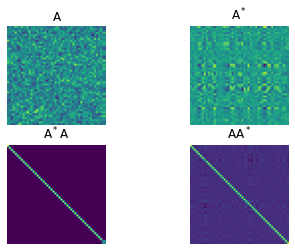

AA* and A*A looks similar, but they are not the same
AA*: 49.78
A*A: 50.00


In [19]:
n = 50

# Create full-rank matrix
A = np.random.randn(n, n)

# Make it rank-decificent
A[:, n - 1] = A[:, n - 2]

print(f'Rank: {np.linalg.matrix_rank(A)}')

# Compute pseudo-inverse
Ai = np.linalg.pinv(A)

plt.subplot(221)
plt.imshow(A)
plt.axis('off')
plt.title('A')

plt.subplot(222)
plt.imshow(Ai)
plt.axis('off')
plt.title('A$^*$')

plt.subplot(223)
plt.imshow(Ai @ A)
plt.axis('off')
plt.title('A$^*$A')

plt.subplot(224)
plt.imshow(A @ Ai)
plt.axis('off')
plt.title('AA$^*$')

plt.show()

print('AA* and A*A looks similar, but they are not the same')
print(f'AA*: {np.sum(A @ Ai):.2f}')
print(f'A*A: {np.sum(Ai @ A):.2f}')

## Invertible matrix has the same real inverse and pseudoinverse

In [22]:
m = 5

# Make invertible matrix
A = np.random.randn(m, m)

AinvF = np.linalg.inv(A)
AinvP = np.linalg.pinv(A)

print('Real inverse')
print(np.round(AinvF, 3))
print()

print('Pseudoinverse')
print(np.round(AinvP, 3))
print()

print('Pseudoinverse - Real inverse should returns 0 matrix if invertible matrix')
print(np.round(AinvP - AinvF, 3))
print()

Real inverse
[[ 0.817 -0.131 -0.182  0.029  0.307]
 [-1.12  -0.041  1.467  0.791 -0.175]
 [-1.006 -0.565  0.251  0.379  0.31 ]
 [-0.371 -0.571  0.66   0.17  -0.164]
 [ 0.6    0.416 -0.002 -0.576 -0.018]]

Pseudoinverse
[[ 0.817 -0.131 -0.182  0.029  0.307]
 [-1.12  -0.041  1.467  0.791 -0.175]
 [-1.006 -0.565  0.251  0.379  0.31 ]
 [-0.371 -0.571  0.66   0.17  -0.164]
 [ 0.6    0.416 -0.002 -0.576 -0.018]]

Pseudoinverse - Real inverse should returns 0 matrix if invertible matrix
[[-0. -0.  0.  0. -0.]
 [ 0.  0.  0.  0. -0.]
 [ 0.  0. -0. -0.  0.]
 [ 0.  0.  0.  0. -0.]
 [-0. -0.  0.  0. -0.]]

